In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

In [6]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Lenvo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenvo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenvo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenvo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

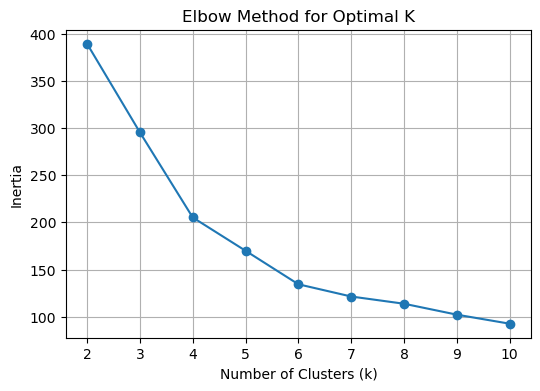

In [8]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
#kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = y_kmeans

C:\Users\Lenvo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
hier = AgglomerativeClustering(n_clusters=5)
hier.fit(X_scaled)
y_hier = hier.predict(X_scaled)
#hier_labels = hier.fit_predict(X_scaled)
data['Hier_Cluster'] = y_hier

In [ ]:
sil_kmeans = silhouette_score(X_scaled, y_kmeans)
sil_hier = silhouette_score(X_scaled, y_hier)

In [12]:
print(f"Silhouette Score (K-Means): {sil_kmeans:.4f}")
print(f"Silhouette Score (Hierarchical): {sil_hier:.4f}")

Silhouette Score (K-Means): 0.4085
Silhouette Score (Hierarchical): 0.3900


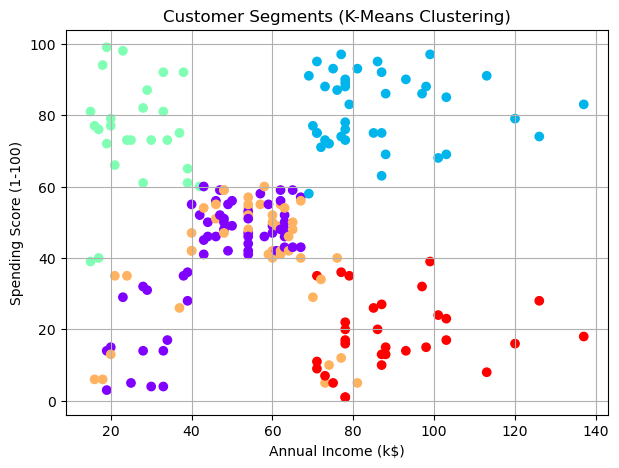

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=data['KMeans_Cluster'], cmap='rainbow')
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()
